**Project**: Detection of Pulmonary Edema using Deep Learning

**Dataset**: NIH chest X-ray dataset (modified to classify only pulmonary Edema), available in kaggle

**Author**: Samiul Bari

To get the modified dataset -
**Email**: samiulbari46@gmail.com

**Importing All Necessary Modules and Packages**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [2]:
#Locate the file in google drive
path = r'C:\My Files\MIST Study\Thesis\Detection_Project\Dataset\image_data'

In [3]:
No_Edema_Img = os.listdir(path + '/NoEdema2/')
Edema_Img = os.listdir(path + '/Edema/')

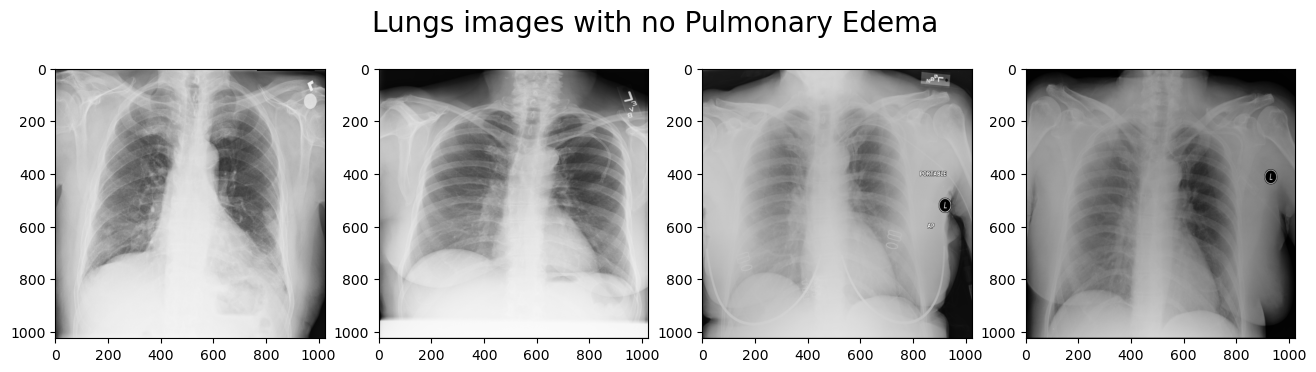

In [4]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/NoEdema2/'+ No_Edema_Img[i])
    plt.imshow(img)
plt.suptitle("Lungs images with no Pulmonary Edema",fontsize=20)
plt.show()

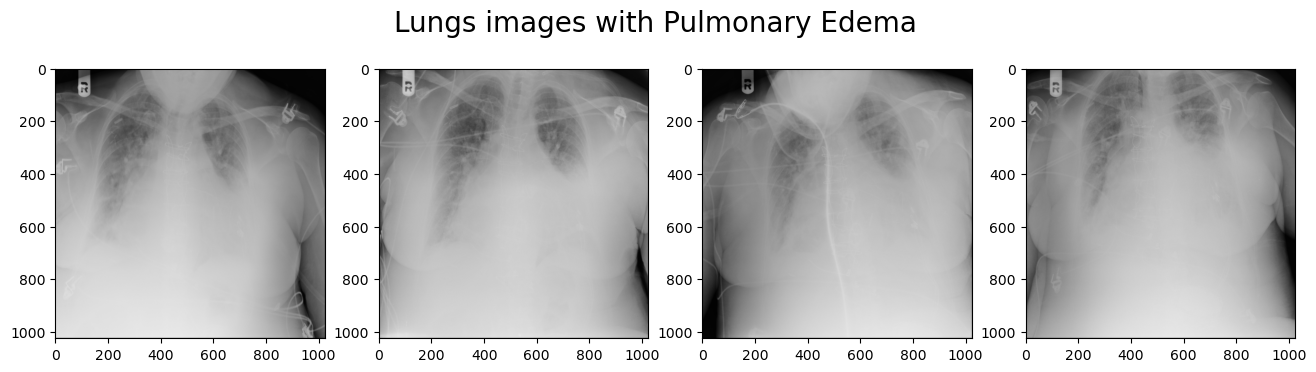

In [5]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Edema/'+ Edema_Img[i])
    plt.imshow(img)
plt.suptitle("Lungs images with Pulmonary Edema",fontsize=20)
plt.show()

In [6]:
Classes = {'NoEdema2':0, 'Edema':1}

**Data Preprocessing**

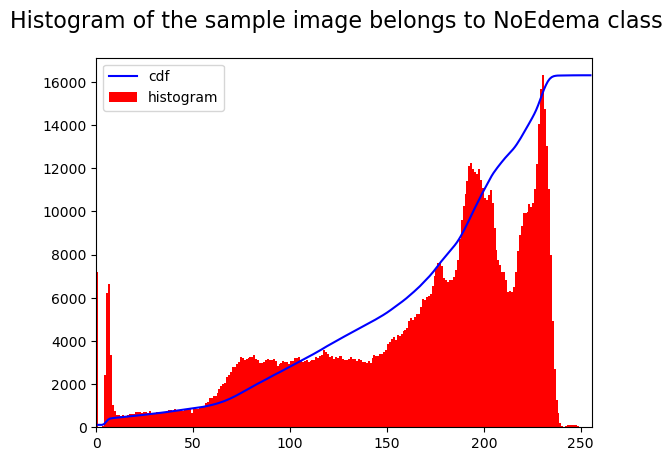

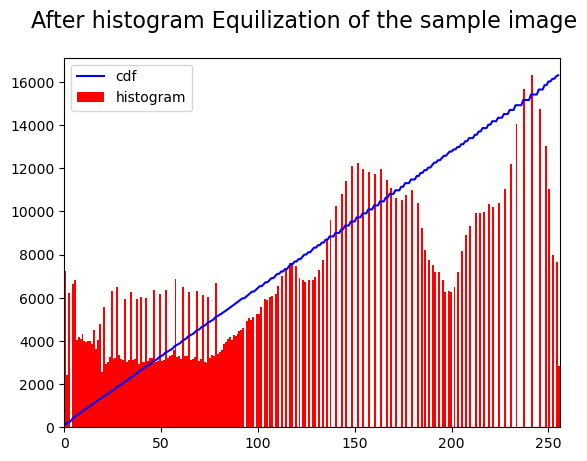

In [7]:
#Histogram display of a sample image

#For NoEdema class
folder_path =r'C:\My Files\MIST Study\Thesis\Detection_Project\Dataset\image_data/NoEdema'
img = cv2.imread(folder_path+'/'+'00003160_001.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.suptitle('Histogram of the sample image belongs to NoEdema class',fontsize=16)
plt.show()

equ = cv2.equalizeHist(img)

hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.suptitle('After histogram Equilization of the sample image',fontsize=16)
plt.show()

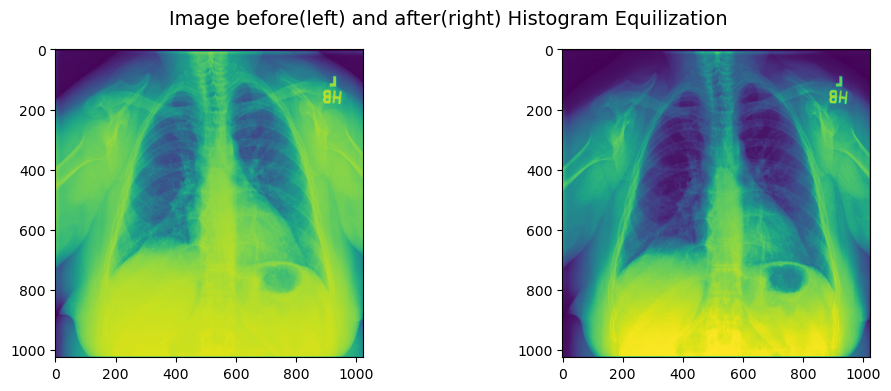

In [8]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img)

plt.suptitle('Image before(left) and after(right) Histogram Equilization',fontsize=14)
plt.subplot(1,2,2)
plt.imshow(equ)

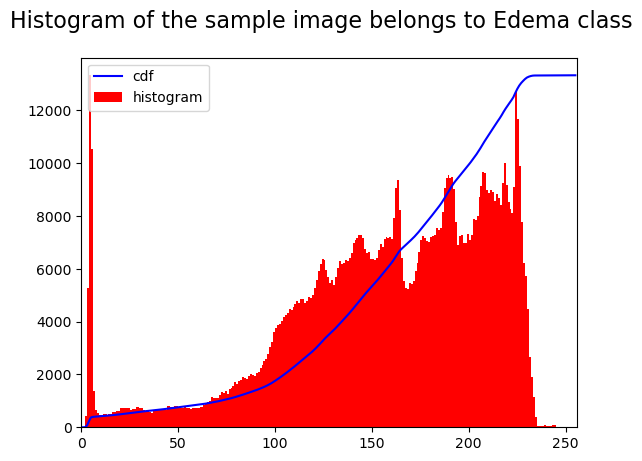

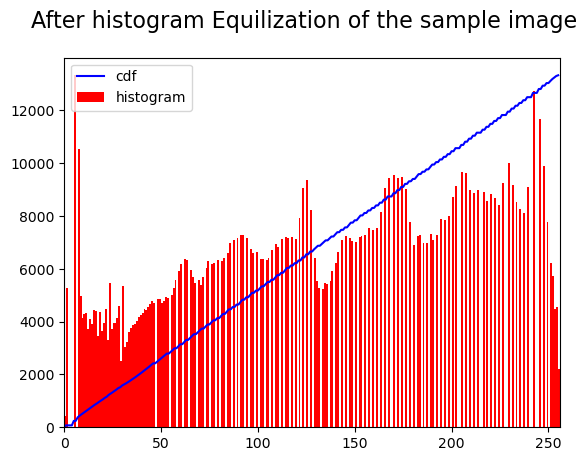

In [9]:
#For Edema class
folder_path =r'C:\My Files\MIST Study\Thesis\Detection_Project\Dataset\image_data/Edema'
img = cv2.imread(folder_path+'/'+'00000032_001.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.suptitle('Histogram of the sample image belongs to Edema class',fontsize=16)
plt.show()

equ = cv2.equalizeHist(img)

hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.suptitle('After histogram Equilization of the sample image',fontsize=16)
plt.show()

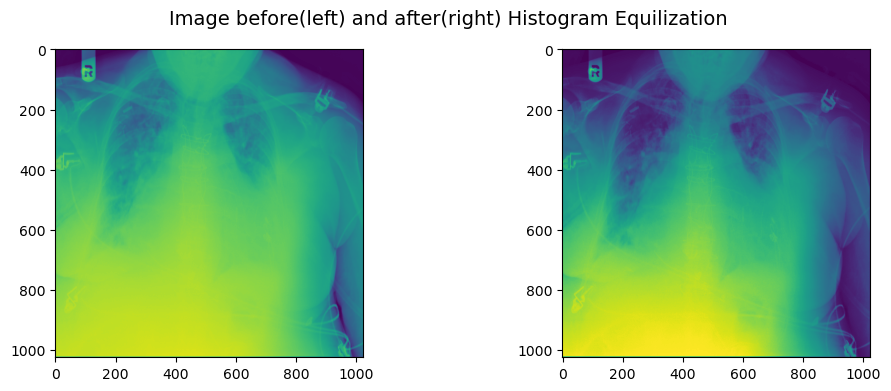

In [10]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img)

plt.suptitle('Image before(left) and after(right) Histogram Equilization',fontsize=14)
plt.subplot(1,2,2)
plt.imshow(equ)

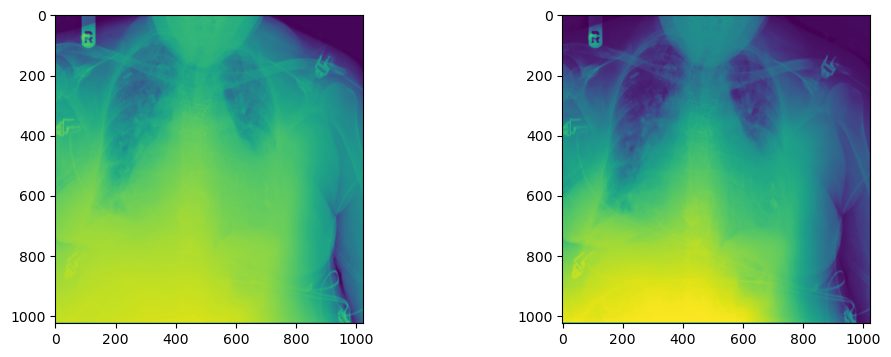

In [11]:
# Apply bilateral filter with d = 15,
# sigmaColor = sigmaSpace = 75.
bilateral = cv2.bilateralFilter(equ, 5, 5, 5)

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(bilateral)

In [12]:
#Modify the images using different pre-processing techniques
X = []
y = []
for i in Classes:
    folder_path =r'C:\My Files\MIST Study\Thesis\Detection_Project\Dataset\image_data/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j, 0)
        #Histogram Equlization of image
        img = cv2.equalizeHist(img)

In [13]:
#resize the images to lower pixels to avoid excessive runtime
X = []
y = []
for i in Classes:
    folder_path =r'C:\My Files\MIST Study\Thesis\Detection_Project\Dataset\image_data/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j, 0)
        #Convetig to 3-channel RGB image so that it can be trained using pre-trained model
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        # resize image
        img = cv2.resize(img, (256,256),interpolation=cv2.INTER_CUBIC)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [14]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((4963, 256, 256, 3), (4963,))

**Dataset Analysis**

In [15]:
#Class division

Class_series=pd.Series(y)
lis=["No Edema","Edema"]
Edema_or_not = Class_series.value_counts().tolist()
values = [Edema_or_not[0], Edema_or_not[1]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Edema & No Edema")
fig.show()

In [16]:
# Used to clean up the memory to get rid of gurbage data
import gc
gc.collect()

59947

**Data Splitting for training and testing**




In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [18]:
X_train.shape

(3970, 256, 256, 3)

In [19]:
X_test.shape

(993, 256, 256, 3)

In [20]:
y_test.shape

(993,)

In [21]:
X_train = X_train.reshape( (-1,256,256, 3))
X_test = X_test.reshape((-1,256,256, 3))

**Import the Model Architecture (VGG 19)**

In [22]:
from tensorflow.keras.applications import VGG16

In [23]:
vgg = VGG16(input_shape=(256,256,3),weights='imagenet',include_top=False)

In [24]:
for layer in vgg.layers:
  layer.trainable=False

In [25]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [48]:
x = Flatten()(vgg.output)
prediction = Dense(1,activation='sigmoid')(x)

In [49]:
from tensorflow.keras.models import Model

In [50]:
model = Model(inputs=vgg.input, outputs=prediction)

In [51]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [52]:
gc.collect()

2568

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [55]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=5, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = './bestmodel.h5', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [56]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy']
)

In [57]:
gc.collect()

0

In [58]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=15,
          callbacks=cd,
          batch_size = 32,
          shuffle=True)

Epoch 1/15
125/125 [==============================] - ETA: 0s - loss: 0.4744 - accuracy: 0.7907
Epoch 1: val_accuracy improved from -inf to 0.80161, saving model to .\bestmodel.h5
125/125 [==============================] - 1300s 10s/step - loss: 0.4744 - accuracy: 0.7907 - val_loss: 0.4349 - val_accuracy: 0.8016
Epoch 2/15
125/125 [==============================] - ETA: 0s - loss: 0.3416 - accuracy: 0.8547
Epoch 2: val_accuracy improved from 0.80161 to 0.81571, saving model to .\bestmodel.h5
125/125 [==============================] - 1257s 10s/step - loss: 0.3416 - accuracy: 0.8547 - val_loss: 0.3915 - val_accuracy: 0.8157
Epoch 3/15
125/125 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8791
Epoch 3: val_accuracy improved from 0.81571 to 0.82175, saving model to .\bestmodel.h5
125/125 [==============================] - 1255s 10s/step - loss: 0.2921 - accuracy: 0.8791 - val_loss: 0.3923 - val_accuracy: 0.8218
Epoch 4/15
125/125 [==============================] 

In [59]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [60]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

     # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

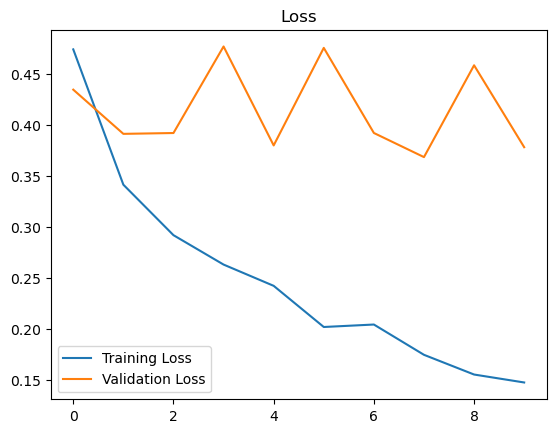

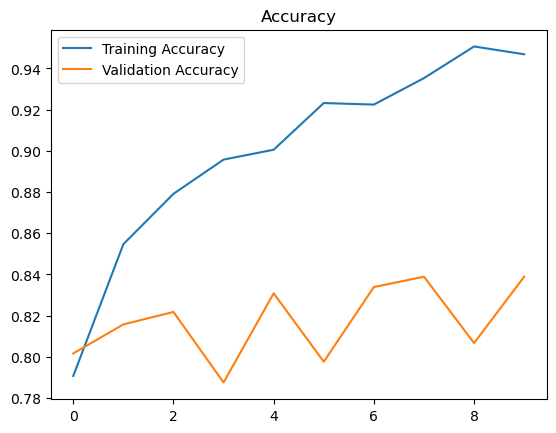

In [61]:
plot_metrics(history)

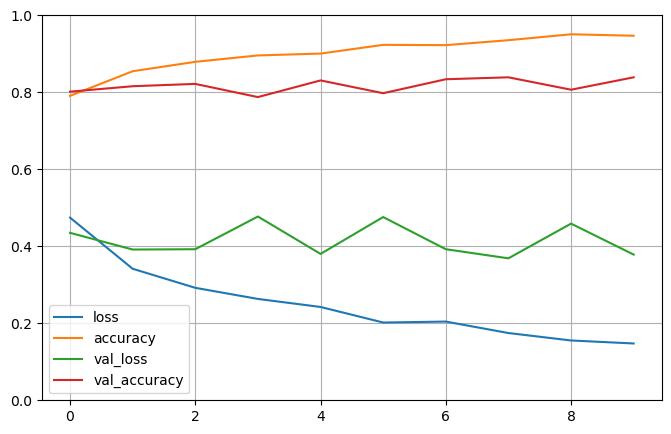

In [62]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [63]:
X.shape

(4963, 256, 256, 3)

In [64]:
X = X.reshape(-1, 256, 256, 3)

In [65]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

125/125 [==============================] - 1089s 9s/step - loss: 0.1299 - accuracy: 0.9554
%
Accuracy: 95.5416 %


In [88]:
y_predicted_tf = model.predict(X_test)
y_predicted= [1 if y>=0.5 else 0 for y in y_predicted_tf]
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

32/32 [==============================] - 289s 9s/step


Y_test  Y_predicted
0       1            1
1       0            0
2       0            0
3       1            0
4       0            0
5       0            0
6       1            1
7       1            0

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

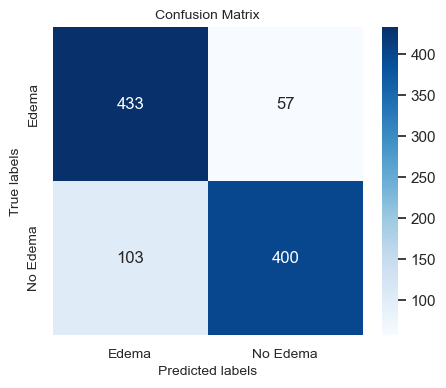

In [90]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['Edema', 'No Edema'], fontsize=10); ax.yaxis.set_ticklabels(['Edema', 'No Edema'], fontsize=10);

In [91]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8836734693877552
Specificity :  0.7952286282306164


In [92]:
f1_score(y_test, y_predicted, average='micro')

0.8388721047331318

In [93]:
recall_score(y_test, y_predicted, average='weighted')

0.8388721047331319

In [94]:
precision_score(y_test, y_predicted, average='micro')

0.8388721047331319

In [95]:
from sklearn .metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test, y_predicted), 3)
auc

0.842

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_predicted_tf)

In [97]:
thresholds

array([          inf, 9.9993712e-01, 9.9887186e-01, 9.9885875e-01,
       9.9635065e-01, 9.9617583e-01, 9.9582160e-01, 9.9581712e-01,
       9.9374181e-01, 9.9357617e-01, 9.7593951e-01, 9.7575420e-01,
       9.7229952e-01, 9.7153801e-01, 9.7090113e-01, 9.7056234e-01,
       9.6773916e-01, 9.6751237e-01, 9.6664828e-01, 9.6602470e-01,
       9.6484470e-01, 9.6453667e-01, 9.5713657e-01, 9.5713139e-01,
       9.5144796e-01, 9.4941717e-01, 9.4323575e-01, 9.4286770e-01,
       9.4114763e-01, 9.4111848e-01, 9.2716253e-01, 9.2622435e-01,
       9.2595220e-01, 9.2553508e-01, 9.2363369e-01, 9.2271745e-01,
       9.2162478e-01, 9.2135352e-01, 9.1879678e-01, 9.1867489e-01,
       9.1432196e-01, 9.1407812e-01, 9.0901703e-01, 9.0697217e-01,
       9.0538353e-01, 9.0212148e-01, 9.0178132e-01, 8.9838320e-01,
       8.9730561e-01, 8.9619297e-01, 8.9118397e-01, 8.8940060e-01,
       8.8304877e-01, 8.8279790e-01, 8.8064134e-01, 8.7130260e-01,
       8.7012160e-01, 8.6990076e-01, 8.6650878e-01, 8.5916603e

In [98]:
import plotly.graph_objects as go
import numpy as np

In [100]:
#generate a trace for ROC curve
trace0 = go.Scatter(
    x = fpr,
    y = tpr,
    mode = 'lines',
    name = 'ROC curve'
)

In [104]:
#Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  #choose indices where index node=0

trace1 = go.Scatter(
    x = fpr[indices],
    y = tpr[indices],
    mode = 'markers+text',
    name = 'threshold points',
    text = [f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition = 'top center'
)

In [107]:
#Diagonal line
trace2 = go.Scatter(
    x = [0,1],
    y = [0,1],
    mode = 'lines',
    name = 'Random(area = 0.5)',
    line = dict(dash ='dash')
)

In [114]:
data = [trace0, trace1, trace2]

In [115]:
#Define layout with square aspect ratio
layout = go.Layout(
    title = 'ROC',
    xaxis = dict(title = 'FPR'),
    yaxis = dict(title = 'TPR'),
    autosize = False,
    width = 800,
    height = 800,
    showlegend = False
)

In [116]:
#Define figure and add data
fig = go.Figure(data=data, layout=layout)

In [117]:
#show figure
fig.show()

In [118]:
#Calclate the optimal threshold
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6195386

In [119]:
y_predicted_tf = model.predict(X_test)
y_predicted= [1 if y>=0.62 else 0 for y in y_predicted_tf]
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

32/32 [==============================] - 282s 9s/step


Y_test  Y_predicted
0       1            1
1       0            0
2       0            0
3       1            0
4       0            0
5       0            0
6       1            1
7       1            0

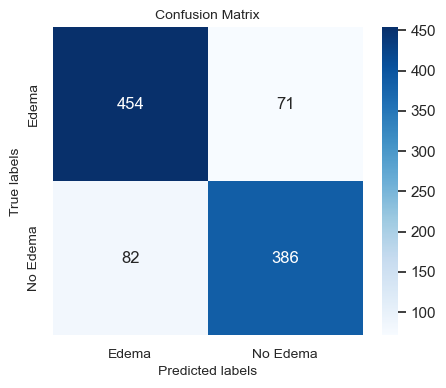

In [120]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['Edema', 'No Edema'], fontsize=10); ax.yaxis.set_ticklabels(['Edema', 'No Edema'], fontsize=10);

In [121]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8647619047619047
Specificity :  0.8247863247863247


In [122]:
f1_score(y_test, y_predicted, average='micro')

0.8459214501510574

In [123]:
recall_score(y_test, y_predicted, average='weighted')

0.8459214501510574

In [124]:
precision_score(y_test, y_predicted, average='micro')

0.8459214501510574

In [125]:
from sklearn .metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test, y_predicted), 3)
auc

0.846